# The KS test for DeepFactor model

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import yaml
from IPython.display import display


In [2]:
from src.RQ1_forecast import *

In [3]:
pd.options.display.max_columns = None

In [4]:
def first_horizon_ks(data_address_val, num_time_series, train_series_number_ks, prediction_length, dataset_name):
    # read the forcast file
    print('reading the experiemtns')
    forcast_list1_val = read_csv_result('forecasts.csv', data_address_val)
    # sort the forcast lists based on their original time series
    print('sorting the experiments')
    sorted_forcast_list1_val = get_sorted_csv(forcast_list1_val, num_time_series=num_time_series)
    target_forcast_series_val = get_forcast_target(forcast_list1_val)
    sample_forcast_list1_val = get_forcast_samples(forcast_list1_val)
    
    # initialize the numpy array
    ks_array = np.zeros((train_series_number_ks, prediction_length))

    # we want to calculate the ks test for the first prediction
    # i from 0 to #ts-1:
    #   j from 168*i to 168*i+24:
    print('calculating the ks test')
    for i in range(train_series_number_ks):
        for j, data_point in enumerate(range(168*i, 168*i+24)):
            ks_table = get_ks_tmp(sample_forcast_list1_val, data_point)  
            ks_array[i,j] = portion_ks_table(ks_table)
        print(f'ts {i}')

    print(f'Mean of {dataset_name} is ={ks_array.mean()}')
    print('\n---------------------------------------------\n')
    return ks_array

def first_horizon_ks_exchange(data_address_val, num_time_series, train_series_number_ks, prediction_length, dataset_name):
    # read the forcast file
    print('reading the experiemtns')
    forcast_list1_val = read_csv_result('forecasts.csv', data_address_val)
    # sort the forcast lists based on their original time series
    print('sorting the experiments')
    sorted_forcast_list1_val = get_sorted_csv(forcast_list1_val, num_time_series=num_time_series)
    target_forcast_series_val = get_forcast_target(forcast_list1_val)
    sample_forcast_list1_val = get_forcast_samples(forcast_list1_val)
    
    # initialize the numpy array
    ks_array = np.zeros((train_series_number_ks, prediction_length))

    # we want to calculate the ks test for the first prediction
    # i from 0 to #ts-1:
    #   j from 168*i to 168*i+24:
    print('calculating the ks test')
    for i in range(train_series_number_ks):
        for j, data_point in enumerate(range(i*30, i*30+30)):
            ks_table = get_ks_tmp(sample_forcast_list1_val, data_point)  
            ks_array[i,j] = portion_ks_table(ks_table)
        print(f'ts {i}')

    print(f'Mean of {dataset_name} is ={ks_array.mean()}')
    print('\n---------------------------------------------\n')
    return ks_array

In [5]:
with open(f'/home/dev/deepts/configs/ks_config_factor.yaml', "r") as f:
            config = yaml.load(f, Loader=yaml.FullLoader)
model_name = 'factor'


# Electricity

101it [00:00, 36607.73it/s]
100%|###########| 100/100 [01:02<00:00,  1.60it/s]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of deep_factor_electricity is =0.004178114478114478

---------------------------------------------



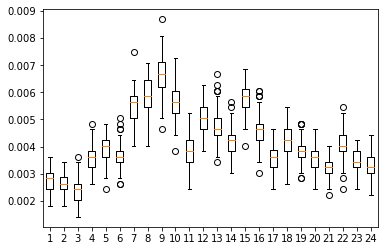

In [31]:
model_name = config['model_name']
dataset_name = "electricity" 
if config[dataset_name] is not None:
    ks_array_electricity = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=321, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_electricity)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')


In [32]:
print(f'the mean is {ks_array_electricity.mean()}')

the mean is 0.004178114478114478


In [33]:
pd.DataFrame({'mean' : ks_array_electricity.mean(axis=0),'std' :ks_array_electricity.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.002737,0.002699,0.002360,0.003545,0.003905,0.003642,0.005509,0.005913,0.006681,0.005687,0.003844,0.005111,0.004788,0.004166,0.005830,0.004592,0.003610,0.004123,0.003865,0.003602,0.003232,0.004081,0.003451,0.003301
std,0.000447,0.000345,0.000427,0.000415,0.000437,0.000454,0.000541,0.000607,0.000734,0.000610,0.000511,0.000519,0.000551,0.000502,0.000558,0.000599,0.000448,0.000500,0.000431,0.000455,0.000401,0.000543,0.000441,0.000452


# Solar_nips

101it [00:00, 35863.93it/s]
100%|###########| 100/100 [00:29<00:00,  3.43it/s]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of deep_factor_solar_nips is =0.40814974747474747

---------------------------------------------



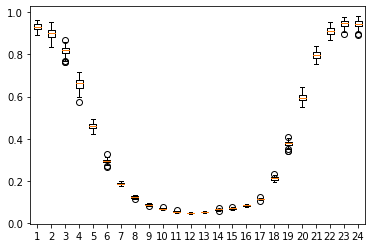

In [34]:
dataset_name = 'solar_nips'
if config[dataset_name] is not None:
    ks_array_solar = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=137, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_solar)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')



In [39]:
print(f'the mean is {ks_array_solar.mean()}')

the mean is 0.40814974747474747


In [46]:
pd.DataFrame({'mean' : ks_array_solar.mean(axis=0),'std' :ks_array_solar.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.932473,0.900689,0.817905,0.660655,0.459115,0.294352,0.186289,0.123028,0.087368,0.067451,0.052933,0.047036,0.051709,0.063903,0.069269,0.082636,0.113380,0.211610,0.377770,0.594897,0.796677,0.912109,0.946412,0.945929
std,0.017118,0.022920,0.022459,0.024995,0.014291,0.009262,0.004559,0.003759,0.003150,0.002329,0.002266,0.001723,0.002015,0.002206,0.002590,0.002555,0.003251,0.007464,0.012598,0.018151,0.019748,0.017307,0.016267,0.017347


# Exchange rate

101it [00:00, 1352.33it/s]
100%|###########| 100/100 [00:06<00:00, 15.03it/s]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
Mean of factor_exchange_rate is =0.9561255892255893

---------------------------------------------



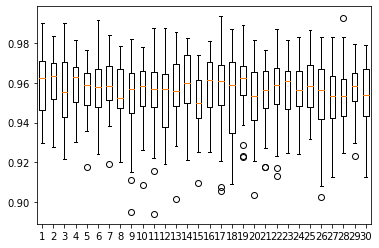

In [6]:
dataset_name = "exchange_rate"
if config[dataset_name] is not None:
    ks_array_exchange = first_horizon_ks_exchange(data_address_val=config[dataset_name], num_time_series=8, train_series_number_ks=40, prediction_length=30, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_exchange)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')

In [7]:
print(f'the mean is {ks_array_exchange.mean()}')

the mean is 0.9561255892255893


In [8]:
pd.DataFrame({'mean' : ks_array_exchange.mean(axis=0),'std' :ks_array_exchange.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
mean,0.959136,0.960293,0.956742,0.959495,0.956273,0.957894,0.958702,0.954631,0.952808,0.955833,0.955348,0.953404,0.956758,0.960187,0.950394,0.958359,0.957313,0.954854,0.959273,0.954146,0.953763,0.95650,0.957121,0.956838,0.957813,0.952949,0.952515,0.954914,0.956091,0.953419
std,0.015971,0.012744,0.015373,0.012392,0.012371,0.015991,0.013000,0.014684,0.017794,0.014858,0.018930,0.017206,0.016500,0.014869,0.014379,0.014384,0.018657,0.019809,0.014548,0.017092,0.015104,0.01685,0.013966,0.013340,0.014045,0.019649,0.016742,0.014618,0.012286,0.015773


# Traffic_nips

101it [00:00, 37725.95it/s]
100%|###########| 100/100 [10:32<00:00,  6.33s/it]
sorting the experiments
calculating the ks test
ts 0
ts 1
ts 2
ts 3
ts 4
ts 5
ts 6
ts 7
ts 8
ts 9
ts 10
ts 11
ts 12
ts 13
ts 14
ts 15
ts 16
ts 17
ts 18
ts 19
ts 20
ts 21
ts 22
ts 23
ts 24
ts 25
ts 26
ts 27
ts 28
ts 29
ts 30
ts 31
ts 32
ts 33
ts 34
ts 35
ts 36
ts 37
ts 38
ts 39
ts 40
ts 41
ts 42
ts 43
ts 44
ts 45
ts 46
ts 47
ts 48
ts 49
ts 50
ts 51
ts 52
ts 53
ts 54
ts 55
ts 56
ts 57
ts 58
ts 59
ts 60
ts 61
ts 62
ts 63
ts 64
ts 65
ts 66
ts 67
ts 68
ts 69
ts 70
ts 71
ts 72
ts 73
ts 74
ts 75
ts 76
ts 77
ts 78
ts 79
ts 80
ts 81
ts 82
ts 83
ts 84
ts 85
ts 86
ts 87
ts 88
ts 89
ts 90
ts 91
ts 92
ts 93
ts 94
ts 95
ts 96
ts 97
ts 98
ts 99
Mean of deep_factor_traffic_nips is =0.30190648148148147

---------------------------------------------



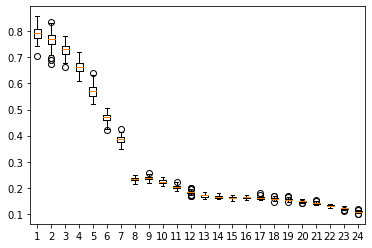

In [50]:
dataset_name = 'traffic_nips'
if config[dataset_name] is not None:
    ks_array_traffic = first_horizon_ks(data_address_val=config[dataset_name], num_time_series=963, train_series_number_ks=100, prediction_length=24, dataset_name=f'{model_name}_{dataset_name}')
    plt.boxplot(ks_array_traffic)
    plt.savefig(f'/home/dev/deepts/plots/ks_{model_name}_{dataset_name}')

In [51]:
print(f'the mean is {ks_array_traffic.mean()}')

the mean is 0.30190648148148147


In [52]:
pd.DataFrame({'mean' : ks_array_traffic.mean(axis=0),'std' :ks_array_traffic.std(axis=0)}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
mean,0.791935,0.767323,0.729329,0.662269,0.570808,0.468521,0.385440,0.232980,0.237444,0.223370,0.204232,0.182851,0.170420,0.166186,0.162455,0.163293,0.161630,0.158859,0.154970,0.148703,0.141267,0.130968,0.121465,0.109038
std,0.025704,0.030519,0.026223,0.024499,0.023585,0.016871,0.014755,0.006694,0.008073,0.007289,0.006838,0.005867,0.005584,0.004892,0.004401,0.004604,0.004522,0.004596,0.004217,0.003456,0.004152,0.003515,0.003464,0.003084
